<h1 style="color: #3636ff;">Линейная алгебра. Практическая работа №14</h1>

<a href="https://olgabelitskaya.github.io/README.html">&#x1F300; &nbsp; Home Page</a> &nbsp; &nbsp; <a href="https://github.com/OlgaBelitskaya/linear_algebra_practice/blob/master/work1_13.ipynb">📓 &nbsp; Previous</a>

### Программные средства

[LaTeX. Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[Sage. Linear Algebra](http://doc.sagemath.org/html/en/tutorial/tour_linalg.html)

[Numpy. Quickstart tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html#linear-algebra)

[R Functions - Tutorialspoint](https://www.tutorialspoint.com/r/r_functions.htm)

[Quick-R: User-Defined Functions](https://www.statmethods.net/management/userfunctions.html)

### Конспекты

[АЛГЕБРА И ГЕОМЕТРИЯ ДЛЯ СТУДЕНТОВ-ФИЗИКОВ](http://math.phys.msu.ru/data/24/Algebra_and_geometry.pdf)

[Курс лекций по линейной алгебре и геометрии](http://mech.math.msu.su/~manuilov/linalg2008.pdf)

[ТЕНЗОРНАЯ АЛГЕБРА И ТЕНЗОРНЫЙ АНАЛИЗ](http://tm.spbstu.ru/images/6/6e/Vilch-Tensor5.pdf)

[Computational Mathematics with SageMath](http://dl.lateralis.org/public/sagebook/sagebook-ba6596d.pdf)

[Introduction to Symbolic Computation](http://homepages.math.uic.edu/~jan/mcs320/mcs320.pdf)

[Symbolic tensor calculus on manifolds](https://sagemanifolds.obspm.fr/jncf2018/)

# Тензоры

## 1. Основные понятия. 
    
Тензор  типа $(p, q)$ - полилинейная функция:

- от $p$ векторов линейного простанства $V$ на полем $\mathbb{K}$ 

- и $q$ линейных функций двойственного к нему пространства $V'$, 

- принимающая значения в $\mathbb{K}$,

- линейная по каждому аргументу при фиксированных остальных аргументах.

_Примеры:_

1) скаляры — тензоры типа (0, 0) $\mathbb{K}$;

2) векторы — тензоры типа (0, 1) $\mathbb{K} \to V$;

3) линейные функции — тензоры типа (1, 0) $V \to \mathbb{K}$;

4) билинейные функции — тензоры типа (2, 0) $V \times V \to \mathbb{K}$;

5) линейные операторы — тензоры типа (1, 1) $V \to V$.

Тензорное исчисление применяется и в случае дифференциальных операторов (тензорный анализ). 

In [4]:
%display ascii_art

In [5]:
M=FiniteRankFreeModule(ZZ,3,name='M')
e=M.basis('e') 
d=[[0,0],[1,0],[0,1],[1,1],[2,0],
   [0,2],[2,1],[1,2],[3,0],[0,3]]
T=[M.tensor_module(d[i][0],d[i][1]) 
   for i in [0..9]]; T

[ Free module of type-(0,0) tensors on the Rank-3 free module M over the Integer Ring,

 Rank-3 free module M over the Integer Ring,

 Free module of type-(0,1) tensors on the Rank-3 free module M over the Integer Ring,

 Free module of type-(1,1) tensors on the Rank-3 free module M over the Integer Ring,

 Free module of type-(2,0) tensors on the Rank-3 free module M over the Integer Ring,

 Free module of type-(0,2) tensors on the Rank-3 free module M over the Integer Ring,

 Free module of type-(2,1) tensors on the Rank-3 free module M over the Integer Ring,

 Free module of type-(1,2) tensors on the Rank-3 free module M over the Integer Ring,

 Free module of type-(3,0) tensors on the Rank-3 free module M over the Integer Ring,

 Free module of type-(0,3) tensors on the Rank-3 free module M over the Integer Ring ]

In [6]:
A1=M.linear_form(name='A1'); A1[:]=(-1,2,-3)
A2=M.linear_form(name='A2'); A2[:]=(3,-2,1)
B1=M([4,-5,6],name='B1'); B2=M([-3,1,2],name='B2')
L=[[l.display(e),l.tensor_type()] 
   for l in [A1,A2,B1,B2]]
for el in L: pretty_print(el)

[ A1 = -e^0 + 2 e^1 - 3 e^2, ( 0, 1 ) ]

[ A2 = 3 e^0 - 2 e^1 + e^2, ( 0, 1 ) ]

[ B1 = 4 e_0 - 5 e_1 + 6 e_2, ( 1, 0 ) ]

[ B2 = -3 e_0 + e_1 + 2 e_2, ( 1, 0 ) ]

In [7]:
import numpy,sympy
sympy.init_printing(use_unicode=True)
NA=numpy.array(range(1,9)).reshape(2,2,2)
NB=numpy.array(["♔","♕","♖","♗"],
               dtype=object).reshape(2,2)
G=numpy.array(['A','B','C','D'],
              dtype=object).reshape(2,2) 
H=numpy.array([1,2,3,4]).reshape(2,2)
F=numpy.array([5,6,7,8]).reshape(2,2)

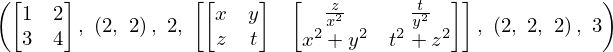

In [8]:
x,y,z,t,u,v,w=sympy.symbols('x,y,z,t,u,v,w')
SA=sympy.Array([[1,2],[3,4]])
SB=sympy.Array([[[x,y],[z,t]],
                [[z/x**2,t/y**2],
                 [x**2+y**2,z**2+t**2]]])
SA,SA.shape,SA.rank(),SB,SB.shape,SB.rank()

In [9]:
%%r
A<-array(1:24,c(2,3,4)); B<-array(25:48,c(4,3,2))
C<-array(1:8,c(2,4)); D<-array(9:16,c(2,4))
list(A,B,C,D)

[[1]]
, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12

, , 3

     [,1] [,2] [,3]
[1,]   13   15   17
[2,]   14   16   18

, , 4

     [,1] [,2] [,3]
[1,]   19   21   23
[2,]   20   22   24


[[2]]
, , 1

     [,1] [,2] [,3]
[1,]   25   29   33
[2,]   26   30   34
[3,]   27   31   35
[4,]   28   32   36

, , 2

     [,1] [,2] [,3]
[1,]   37   41   45
[2,]   38   42   46
[3,]   39   43   47
[4,]   40   44   48


[[3]]
     [,1] [,2] [,3] [,4]
[1,]    1    3    5    7
[2,]    2    4    6    8

[[4]]
     [,1] [,2] [,3] [,4]
[1,]    9   11   13   15
[2,]   10   12   14   16


In [10]:
%%r
G<-t(array(LETTERS[1:8],c(2,2))) 
H<-t(array(c(1:4),c(2,2))) 
F<-t(array(c(5,6,7,8),c(2,2)))
list(G,H,F)

[[1]]
     [,1] [,2]
[1,] "A"  "B" 
[2,] "C"  "D" 

[[2]]
     [,1] [,2]
[1,]    1    2
[2,]    3    4

[[3]]
     [,1] [,2]
[1,]    5    6
[2,]    7    8


## 2. Умножение тензоров второго ранга

Формальное произведение двух векторов (диада) 

(или произведение их координат и ортогональных нормированных векторов базиса):

$ab = (a_m e_m)(b_n e_n) = a_m b_n e_m e_n$

$e_m e_n$ - линейно независимые комбинации, элементы тензорного базиса.

Запишем тензоры в виде: $AB = a_m b_m, GH = g_n h_n$

Единичный тензор второго ранга $E$ и вектор $x$: 

$E \cdot x = x \cdot E = x$

$E = e_1 e_1 + e_2 e_2 + e_3 e_3$

1. Скалярное умножение тензора на вектор

$AB \cdot c = a_m (b_m \cdot c), c \cdot AB = (c \cdot a_m) b_m$

! тензор 2-го ранга на вектор = вектор

2. Векторное умножение тензора на вектор

$AB \times c = a_m (b_m \times c), c \times AB = (c \times a_m) b_m$

! тензор 2-ого ранга на вектор = тензор 2-ого ранга

3. Тензорное умножение тензора на вектор

$AB c = a_m b_m c, c AB = c a_m b_m$

! тензор 2-ого ранга на вектор = тензор 3-ого ранга

4. Скалярное умножение тензора на тензор

$AB \cdot  GH = (a_m b_m) \cdot (g_n h_n) = (b_m \cdot g_n) a_m h_n$

! тензор 2-ого ранга на тензор 2-ого ранга = тензор 2-ого ранга

5. Векторное умножение тензоров

$AB \times GH = (a_m b_m) \times (g_n h_n) = a_m (b_m \times g_n) h_n$

! тензор 2-ого ранга на тензор 2-ого ранга = тензор 3-ого ранга

6. Тензорное умножение тензоров

$AB \ GH = a_m b_m g_n h_n$

! тензор 2-ого ранга на тензор 2-ого ранга = тензор 4-ого ранга

7. Двойное скалярное умножение тензоров

$AB \cdot \cdot GH = (a_m b_m) \cdot \cdot (g_n h_n) = (b_m \cdot g_n) (a_m \cdot h_n)$

! тензор 2-ого ранга на тензор 2-ого ранга = скаляр

8. Двойное векторное умножение тензоров

$AB \times \times GH = (a_m b_m) \times \times (g_n h_n) = (b_m \times g_n) (a_m \times h_n)$

! тензор 2-ого ранга на тензор 2-ого ранга = тензор 2-ого ранга

9. Скалярно-векторное умножение тензоров

$AB \cdot \times GH = (a_m b_m) \cdot \times (g_n h_n) = (b_m \cdot g_n) (a_m \times h_n)$

! тензор 2-ого ранга на тензор 2-ого ранга =  вектор

10. Векторно-скалярное умножение тензоров

$AB \times \cdot GH = (a_m b_m) \times \cdot (g_n h_n) = (b_m \times g_n) (a_m \cdot h_n)$

! тензор 2-ого ранга на тензор 2-ого ранга =  вектор

### Свойства умножение тензоров второго ранга

1) $c \cdot A = A^T \cdot c$;

2) $(c \times A)^T = −A^T \times c$;

3) $c \cdot A \cdot d = d \cdot A^T \cdot = A \cdot \cdot (dc) = (dc) \cdot \cdot A$;

4) $(c \times d) \times A = (dc − cd) \cdot A$;

5) $(A \cdot B)^T = B^T \cdot A^T$;

и т.д.

In [11]:
A1A2=A1*A2; MA1A2=matrix(A1A2.comp(e))
v=matrix(SR,3,[3,2,1])
vA1A2=MA1A2*v # MA1A2: v → vA1A2
A1B1=A1*B1; MA1B1=matrix(A1B1.comp(e))
vA1B1=MA1B1*v # MA1B1: v → vA1B1
B1B2=B1*B2; MB1B2=matrix(B1B2.comp(e))
vB1B2=MB1B2*v # MB1B2: v → vB1B2
L=[[A1A2.display(e),A1A2.tensor_type()],
   MA1A2,[v,vA1A2],
   [A1B1.display(e),A1B1.tensor_type()],
   MA1B1,[v,vA1B1],
   [B1B2.display(e),B1B2.tensor_type()],
   MB1B2,[v,vB1B2]]
for el in L: pretty_print(el)

[ A1*A2 = -3 e^0*e^0 + 2 e^0*e^1 - e^0*e^2 + 6 e^1*e^0 - 4 e^1*e^1 + 2 e^1*e^2 - 9 e^2*e^0 + 6 e^2*e^1 - 3 e^2*e^2,

 ( 0, 2 ) ]

[-3  2 -1]
[ 6 -4  2]
[-9  6 -3]

[ [3]  [ -6] ]
[ [2]  [ 12] ]
[ [1], [-18] ]

[ A1*B1 = -4 e_0*e^0 + 8 e_0*e^1 - 12 e_0*e^2 + 5 e_1*e^0 - 10 e_1*e^1 + 15 e_1*e^2 - 6 e_2*e^0 + 12 e_2*e^1 - 18 e_2*e^2,

 ( 1, 1 ) ]

[ -4   8 -12]
[  5 -10  15]
[ -6  12 -18]

[ [3]  [ -8] ]
[ [2]  [ 10] ]
[ [1], [-12] ]

[ B1*B2 = -12 e_0*e_0 + 4 e_0*e_1 + 8 e_0*e_2 + 15 e_1*e_0 - 5 e_1*e_1 - 10 e_1*e_2 - 18 e_2*e_0 + 6 e_2*e_1 + 12 e_2*e_2,

 ( 2, 0 ) ]

[-12   4   8]
[ 15  -5 -10]
[-18   6  12]

[ [3]  [-20] ]
[ [2]  [ 25] ]
[ [1], [-30] ]

In [12]:
d=[0,1,2,(0,1),(1,1),(2,1)]
NAB=[numpy.tensordot(NA,NB,d[i]) 
     for i in [0..5]]
for t in NAB: print(t.shape)
[sympy.pprint(el) for el in NAB[2]]
for t in [NAB[1],NAB[3],NAB[4],NAB[5]]:
    print(15*'=_='); 
    [sympy.pprint(el[i,j]) 
     for j in range(2) for i in range(2) 
     for el in t]

(2, 2, 2, 2, 2)
(2, 2, 2)
(2,)
(2, 2, 2)
(2, 2, 2)
(2, 2, 2)
♔♕♕♖♖♖♗♗♗♗
♔♔♔♔♔♕♕♕♕♕♕♖♖♖♖♖♖♖♗♗♗♗♗♗♗♗
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_=
♔♖♖
♔♔♔♔♔♖♖♖♖♖♖
♔♔♔♖♖♖♖
♔♔♔♔♔♔♔♖♖♖♖♖♖♖♖
♕♗♗
♕♕♕♕♕♗♗♗♗♗♗
♕♕♕♗♗♗♗
♕♕♕♕♕♕♕♗♗♗♗♗♗♗♗
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_=
♔♕♕♕♕♕
♔♔♔♕♕♕♕♕♕♕
♔♔♕♕♕♕♕♕
♔♔♔♔♕♕♕♕♕♕♕♕
♖♗♗♗♗♗
♖♖♖♗♗♗♗♗♗♗
♖♖♗♗♗♗♗♗
♖♖♖♖♗♗♗♗♗♗♗♗
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_=
♔♕♕♕
♔♔♔♔♔♕♕♕♕♕♕♕
♔♔♕♕♕♕
♔♔♔♔♔♔♕♕♕♕♕♕♕♕
♖♗♗♗
♖♖♖♖♖♗♗♗♗♗♗♗
♖♖♗♗♗♗
♖♖♖♖♖♖♗♗♗♗♗♗♗♗
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_=
♔♕♕
♔♔♔♔♔♕♕♕♕♕♕
♔♔♔♕♕♕♕
♔♔♔♔♔♔♔♕♕♕♕♕♕♕♕
♖♗♗
♖♖♖♖♖♗♗♗♗♗♗
♖♖♖♗♗♗♗
♖♖♖♖♖♖♖♗♗♗♗♗♗♗♗


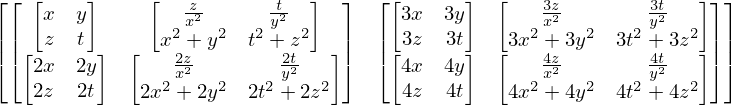

(2, 2, 2, 2, 2)


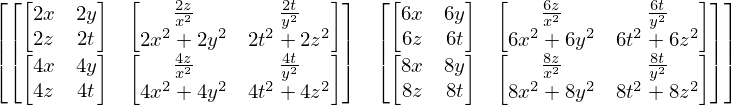

(2, 2, 2, 2, 2)


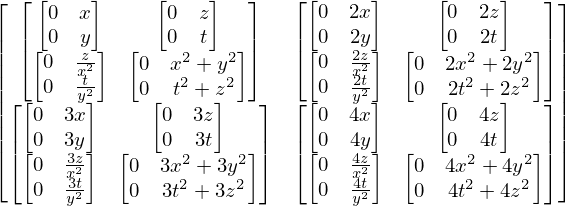

(2, 2, 2, 2, 2, 2)


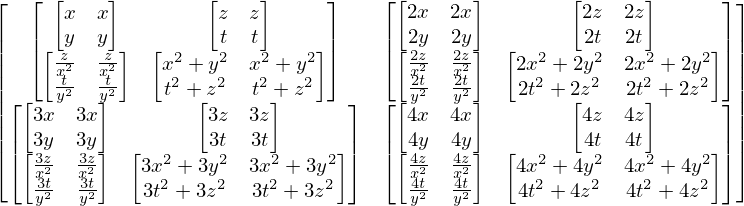

(2, 2, 2, 2, 2, 2)


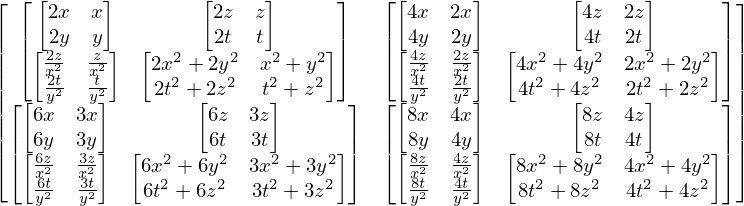

(2, 2, 2, 2, 2, 2)


In [13]:
d1=[1,2,(0,1),(1,1),(2,1)]
SAB=[sympy.tensorproduct(SA,SB,d1[i]) 
     for i in range(5)]
for el in SAB: 
    display(el); print(el.shape)
d2=[(0,1,2),(0,1),(0,2),(1,2)]
SBC=[sympy.tensorcontraction(SB,d2[i]) 
     for i in range(4)]
SBC

In [16]:
%%r
print(c(dim(A%*%B),A%*%B))
print(dim(A%o%B)); A%o%B[1]

[1]     1     1 12100
[1] 2 3 4 4 3 2
, , 1, 1

     [,1] [,2] [,3]
[1,]   25   75  125
[2,]   50  100  150

, , 2, 1

     [,1] [,2] [,3]
[1,]  175  225  275
[2,]  200  250  300

, , 3, 1

     [,1] [,2] [,3]
[1,]  325  375  425
[2,]  350  400  450

, , 4, 1

     [,1] [,2] [,3]
[1,]  475  525  575
[2,]  500  550  600


In [17]:
%%r
list(dim(C*D),C*D)

[[1]]
[1] 2 4

[[2]]
     [,1] [,2] [,3] [,4]
[1,]    9   33   65  105
[2,]   20   48   84  128


In [19]:
%%r
list(dim(t(C)*t(D)),t(C)*t(D))

[[1]]
[1] 4 2

[[2]]
     [,1] [,2]
[1,]    9   20
[2,]   33   48
[3,]   65   84
[4,]  105  128


## 3. Примеры применения тензорного исчисления.

In [20]:
Md=Manifold(2,'Md')
U=Md.open_subset('U'); V=Md.open_subset('V')
XU.<x,y>=U.chart(); XV.<xp,yp>=V.chart("xp:x’ yp:y’")
Md.declare_union(U,V)
XU_to_XV=XU.transition_map(XV,\
(2*x/(x^2+y^2),2*y/(x^2+y^2)),intersection_name='W',\
restrictions1=x^2+y^2!=0,restrictions2=xp^2+yp^2!=0)
R3=Manifold(3,'R^3',r'\mathbb{R}^3')
XR3.<X,Y,Z>=R3.chart()
Delta1=Md.diff_map(R3,\
{(XU,XR3):[1*x/(1+x^2+y^2),1*y/(1+x^2+y^2),
           (x^2+y^2-1)/(1+x^2+y^2)],\
(XV,XR3):[3*xp/(1+xp^2+yp^2),3*yp/(1+xp^2+yp^2),
          (1-xp^2-yp^2)/(1+xp^2+yp^2)]},\
name='Delta1',latex_name=r'\Delta_1')
Delta2=Md.diff_map(R3,\
{(XU,XR3):[6*x/(1+x^2+y^2),6*y/(1+x^2+y^2),
           (x^2+y^2-1)/(1+x^2+y^2)],\
(XV,XR3):[12*xp/(1+xp^2+yp^2),12*yp/(1+xp^2+yp^2),
          (1-xp^2-yp^2)/(1+xp^2+yp^2)]},\
name='Delta2',latex_name=r'\Delta_2')
p=XU.plot(chart=XR3,mapping=Delta1,number_values=30,
          color='#3636ff',label_axes=False)+\
XV.plot(chart=XR3,mapping=Delta1,number_values=30,
        color='#ff36ff',label_axes=False)+\
XU.plot(chart=XR3,mapping=Delta2,number_values=45,
        color='#ff3636',label_axes=False)+\
XV.plot(chart=XR3,mapping=Delta2,number_values=6,
        color='#36ff36',thickness=2,label_axes=False)
p.show(frame=False)

Graphics3d Object

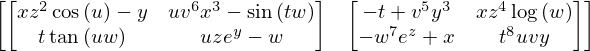

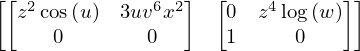

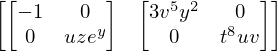

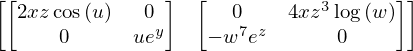

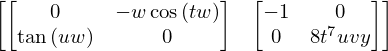

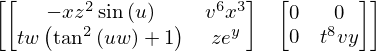

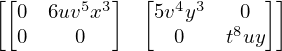

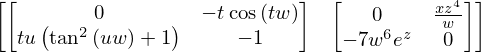

In [22]:
x,y,z,t,u,v,w=sympy.symbols('x,y,z,t,u,v,w')
ST=sympy.Array([[[x*sympy.cos(u)*z^2-y,x^3*u*v^6-sympy.sin(w*t)],
                 [t*sympy.tan(u*w),sympy.exp(y)*z*u-w]],
                [[y^3*v^5-t,x*sympy.log(w)*z^4],
                 [x-sympy.exp(z)*w^7,y*t^8*u*v]]])
display(ST)
for el in [x,y,z,t,u,v,w]: 
    display(ST.diff(el))

In [23]:
GH=numpy.tensordot(H,G,0)
sympy.pprint(GH); GH.shape

     [[[['A' 'B']    
       ['C' 'D']]    
                     
      [['AA' 'BB']   
      ['CC' 'DD']]]  
                     
                     
    [[['AAA' 'BBB']  
     ['CCC' 'DDD']]  
                     
    [['AAAA' 'BBBB'] 
   ['CCCC' 'DDDD']]]]


In [24]:
%%r
GH<-outer(G,H,FUN=paste); list(GH,dim(GH))

[[1]]
, , 1, 1

     [,1]  [,2] 
[1,] "A 1" "B 1"
[2,] "C 1" "D 1"

, , 2, 1

     [,1]  [,2] 
[1,] "A 3" "B 3"
[2,] "C 3" "D 3"

, , 1, 2

     [,1]  [,2] 
[1,] "A 2" "B 2"
[2,] "C 2" "D 2"

, , 2, 2

     [,1]  [,2] 
[1,] "A 4" "B 4"
[2,] "C 4" "D 4"


[[2]]
[1] 2 2 2 2


In [25]:
GHF=numpy.kron(GH,F); sympy.pprint(GHF)
GHF.shape

                  [[[['AAAAA' 'AAAAAA' 'BBBBB' 'BBBBBB']                 
                 ['AAAAAAA' 'AAAAAAAA' 'BBBBBBB' 'BBBBBBBB']             
                     ['CCCCC' 'CCCCCC' 'DDDDD' 'DDDDDD']                 
                ['CCCCCCC' 'CCCCCCCC' 'DDDDDDD' 'DDDDDDDD']]             
                                                                         
         [['AAAAAAAAAA' 'AAAAAAAAAAAA' 'BBBBBBBBBB' 'BBBBBBBBBBBB']      
            ['AAAAAAAAAAAAAA' 'AAAAAAAAAAAAAAAA' 'BBBBBBBBBBBBBB'        
                             'BBBBBBBBBBBBBBBB']                         
          ['CCCCCCCCCC' 'CCCCCCCCCCCC' 'DDDDDDDDDD' 'DDDDDDDDDDDD']      
            ['CCCCCCCCCCCCCC' 'CCCCCCCCCCCCCCCC' 'DDDDDDDDDDDDDD'        
                            'DDDDDDDDDDDDDDDD']]]                        
                                                                         
                                                                         
        [[['AAAAAAAAAAAAAAA' 'AAAAAAAA

In [26]:
%%r
GHF<-kronecker(GH,F,FUN=paste)
list(GHF,dim(GHF))

[[1]]
, , 1, 1

     [,1]    [,2]    [,3]    [,4]   
[1,] "A 1 5" "A 1 6" "B 1 5" "B 1 6"
[2,] "A 1 7" "A 1 8" "B 1 7" "B 1 8"
[3,] "C 1 5" "C 1 6" "D 1 5" "D 1 6"
[4,] "C 1 7" "C 1 8" "D 1 7" "D 1 8"

, , 2, 1

     [,1]    [,2]    [,3]    [,4]   
[1,] "A 3 5" "A 3 6" "B 3 5" "B 3 6"
[2,] "A 3 7" "A 3 8" "B 3 7" "B 3 8"
[3,] "C 3 5" "C 3 6" "D 3 5" "D 3 6"
[4,] "C 3 7" "C 3 8" "D 3 7" "D 3 8"

, , 1, 2

     [,1]    [,2]    [,3]    [,4]   
[1,] "A 2 5" "A 2 6" "B 2 5" "B 2 6"
[2,] "A 2 7" "A 2 8" "B 2 7" "B 2 8"
[3,] "C 2 5" "C 2 6" "D 2 5" "D 2 6"
[4,] "C 2 7" "C 2 8" "D 2 7" "D 2 8"

, , 2, 2

     [,1]    [,2]    [,3]    [,4]   
[1,] "A 4 5" "A 4 6" "B 4 5" "B 4 6"
[2,] "A 4 7" "A 4 8" "B 4 7" "B 4 8"
[3,] "C 4 5" "C 4 6" "D 4 5" "D 4 6"
[4,] "C 4 7" "C 4 8" "D 4 7" "D 4 8"


[[2]]
[1] 4 4 2 2


## 4. Задание

Инициировать скаляры, векторы, тензоры 2-ого ранга и выполнить не меньше 3 видов умножения тензоров,

используя SageMath, Python, R.